# Sample Data Analytics Notebook

In this notebook, we will go over basic Python data analysis pipelines from start to finish to show what a typical data science workflow looks like.


## The problem domain

In this exercise we will create a demo machine learning model that takes four measurements form the flowers (sepal length, sepal width, petal length, and petal width) and identifies the species based on those measurements alone.

We've been given a data set from field researchers to develop the demo, which only includes measurements for three types of Iris flowers:
 
 1. iris setosa 
 2. iris versicolor 
 3. iris virginica
    
The four measurements we're using currently come from hand-measurements by the field researchers, but they will automatically measured by an image processing model in the future.


### Step 1: Answering the question 

The first step to any data analysis project is to define the question or problem we're looking to solve, and to define a measure (or set of measures) for our success at solving that task. The data analysis checklist has to answer a handful of questions to accomplish that, so let's work through those questions.

##### 1. Did we specifiy the type of data analytic question (e.g., exploration, association, causality) before touching the data?
 
We're trying to classify the species (i.e., class) of the flower based on four measuresments that we're provided: sepal length, sepal width, petal length, and petal width.

##### 2. Did we define the metric for success before beginning?

Let's do that now. Since we're performing classification, we can use accuracy - the fraction of correctly classified flowers - to quantify how well our model is performing. We're to achieve a minimum of 90% accuracy.

##### 3. Did we understand the context for the question and the scientific or business application?

We're building part of a data analysis pipeline for a smartphone app that will be able to classify the species of flowers from pictures taken on the smartphone. In the future, this pipeline will be connected to another pipeline that automatically measures from pictures the traits we're using to perform this classification.

##### 4. Did we record the experimental design?

The field researchers are hand-measuring 50 randomly-sampled flowers of each species using a standardized methodology. The field researchers take pictures of each flower they sample from pre-defined angles so the measurements and species can be confirmed by the other field researchers at a later point.

##### 5. Did we consider whether the question could be answered with the available data?

The data set we currently have is only for three types of Iris flowers. The model built off of this data set will only work for those Iris flowers, so we will need more data to create a general flower classifier.

#### NB: Notice we have spent a fair amount of time working on the problem without writing a single line of code or even looking at the data. Thinking about the problem we're working on is an important step to performing effective data analysis that often goes overlooked. Don't skip it.


### Step 2: Checking the data

The next step is to look at the data we're working with. Even curated data sets from the government can have errors in them, and it's vital that we spot these errors before investing too much time in our analysis.

Generally, we're looking to answer the following questions:
  * Is there anything wrong with the data?
  * Are there any quirks with the data?
  * Do we need to fix or remove any of the data?
 

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

# The usual suspects ...
import pandas as pd 
import seaborn as sns 
import sklearn as sk

In [2]:
from sklearn.datasets import load_iris
iris_data = load_iris()

In [3]:
iris_data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris_data.data[10:25]

array([[5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2]])

In [5]:
iris_data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
iris_data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
data = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
data['class'] = iris_data.target

In [9]:
data['class'] = data['class'].replace(
    [0, 1, 2], [iris_data.target_names[0], iris_data.target_names[1], iris_data.target_names[2]])

We've modified the data and put it in a format such the the first row defines the column headers, and the headers are descriptive enough for us to understand what each column represents. The headers even give us the units that the measurements were recorded in, just in case we need to know at a later point in the project.

Each row following the first row represents an entry for a flower: four measurements and one class, which tells us the species of the flower.
One of the first things we should look for is missing data.

Thankfully, the fields researchers already told us that they put a 'NA' when they were missing a measurement.

Next, we'll have a look at the distribution of the data - especially with outliers.

Start by printing some summary statistics about the data set.


In [10]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Tables like these are rarely useful. It's often a good idea to visualize the data. Visualization makes outliers and errors immediately stand out, whereas they might go unnoticed in a large table of numbers.

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt 

Next, let's create a scatterplot matrix.

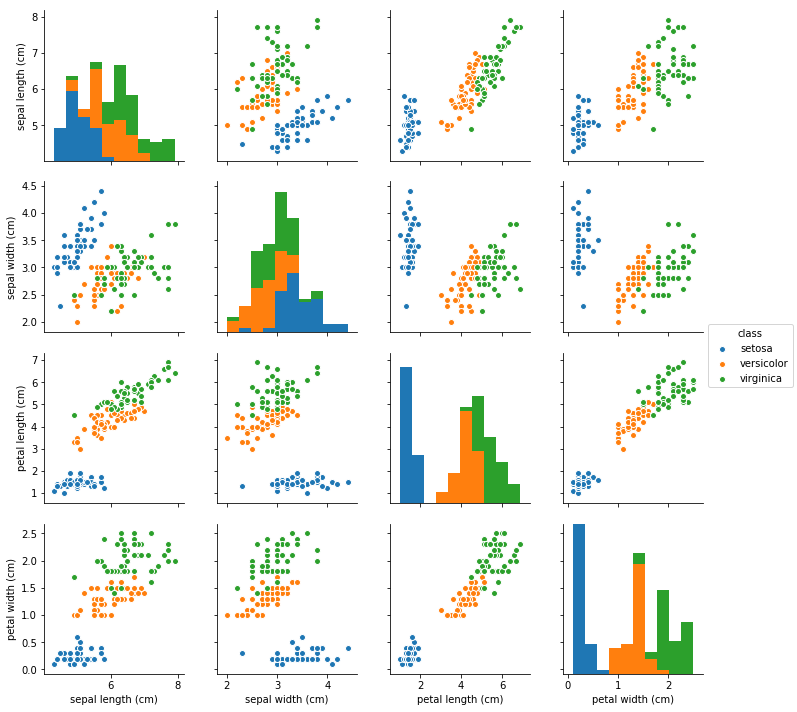

In [12]:
sns.pairplot(data, hue = 'class')

From the scattermatrix, we can already see some issues with the data set:

 1. There are some clear outliers in the measurements that may be erroneous: 
    one sepel width entry for Iris setosa falls well outside its normal range.
    
    
### Step 3: Tidying the data

Now that we've identified several errors in the data set, we need to fix them before we proceed with the analysis.

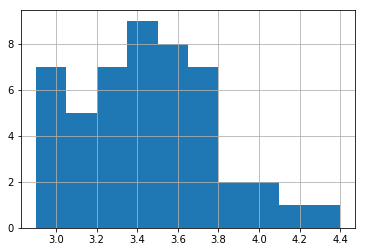

In [13]:
# this line drops any 'Iris-setosa' rows with a sepal width less than 2.5 cm
data = data.loc[(data['class'] != 'setosa') | (data['sepal width (cm)'] >= 2.5)]
data.loc[data['class'] == 'setosa', 'sepal width (cm)'].hist()

Excellent! Now all of our Iris setosa rows have a sepal width greater than 2.5 cm.

The next issue to address is the several near-zero sepal lengths for Iris versicolor rows. Let's take a look at those rows.

In [14]:
data.loc[(data['class'] == 'versicolor') &(data['sepal length (cm)'] < 1.0)]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class


Apparently there is no issue there :-)


Let's take a look and see if we have any missing values:

In [15]:
data.loc[(data['sepal length (cm)'].isnull()) |
         (data['sepal width (cm)'].isnull()) |
         (data['petal length (cm)'].isnull()) |
         (data['petal width (cm)'].isnull())]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class


How about that, no missing entries!

Let's have a look at our data again.

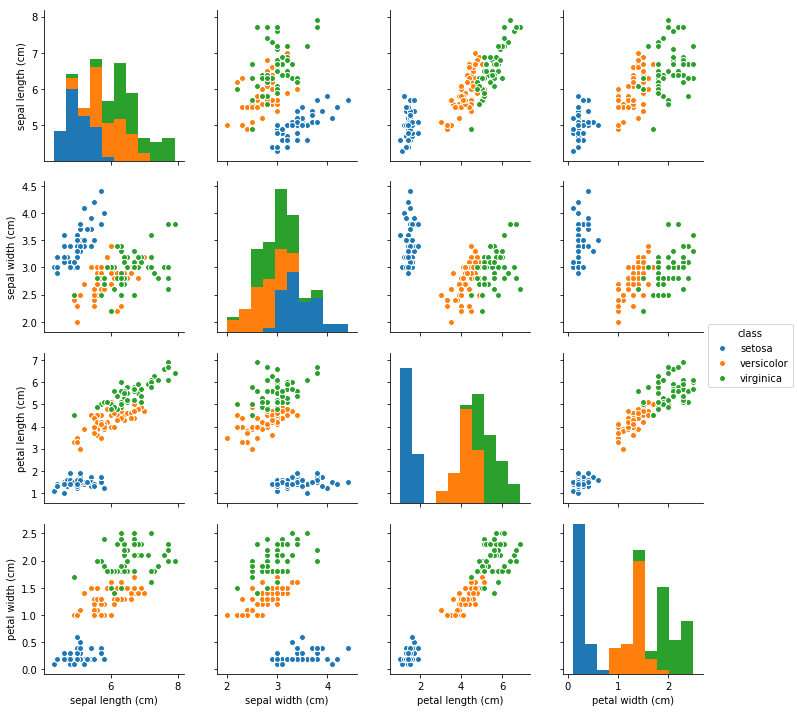

In [16]:
sns.pairplot(data, hue = 'class')

The general takeaways here are:

 1. Make sure the data is encoded properly.
 2. Make sure data falls within the expected range, and use domain knowledge whenever possible to define that expected value.
 3. Deal with missing data in one way or another: replace it or drop it.
 4. Never tidy your data manually because that is not reproducible.
 5. Use code as a record of how you tidied the data.
 6. Plot everything you can about the data at this stage of the analysis so you can visually confirm everything looks correct.
 
### Testing our data

We should test our data. Just how we use unit tests to verify our expectations from code, we can similarly set up unit tests to verify our expectations about our data set.

We can quickly test our data using 'assert' statements: we assert that something must be true, and if its is, then nothing happens and the notebook continues running. However, if our assertion is wrong, then the notebook stops running and brings it to out attention. For example:

In [17]:
assert 1 != 2

Let's test a few things we know about our data set now.

In [18]:
# we know we should only have three classes
assert len(data['class'].unique()) == 3

In [19]:
# we know that sepal lengths for Iris versicolor should never be below 2.5 cm.
assert data.loc[data['class'] == 'versicolor', 'sepal length (cm)'].min() >= 2.5

In [20]:
# we know that our data set should not have any missing measurements
assert len(data.loc[(data['sepal length (cm)'].isnull()) |
                    (data['sepal width (cm)'].isnull()) |
                    (data['petal length (cm)'].isnull()) |
                    (data['petal width (cm)'].isnull())]) == 0

### Step 4: Exploratory analysis

Now after spending entirely too much time tidying the data, we can start to analyze it.

Exploratory analysis is the step where we start delving deeper into the data set beyond the outliers and errors. We'll be looking to answer questions such as:

   1. How is our data distributed?
   2. Are there any correlations in our data?
   3. Are there any confounding factors that explain these correlations?
   
This is the stage where we plot all the data in as many ways as possible. Create many charts, but don't bother making them pretty - these charts are for internal use.

Let's return to the scatter matrix we had earlier.

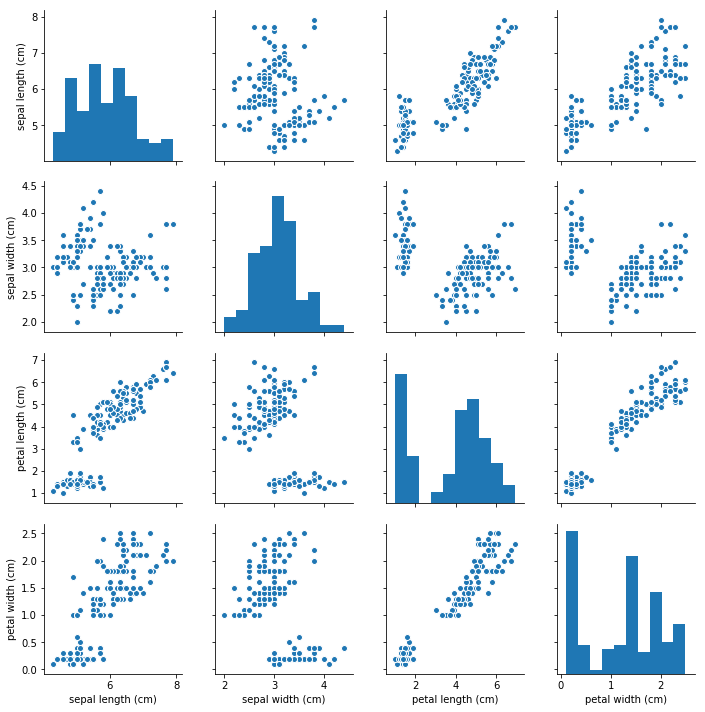

In [21]:
sns.pairplot(data)

Our data is normally distributed for the most part, which is great news if we plan to using any modelling methods that assume the data is normally distributed.

There's something strange going on with the petal measurements. Maybe it's something to do with the different Iris types. Let's color code the data by the class again to see if that clears things up.

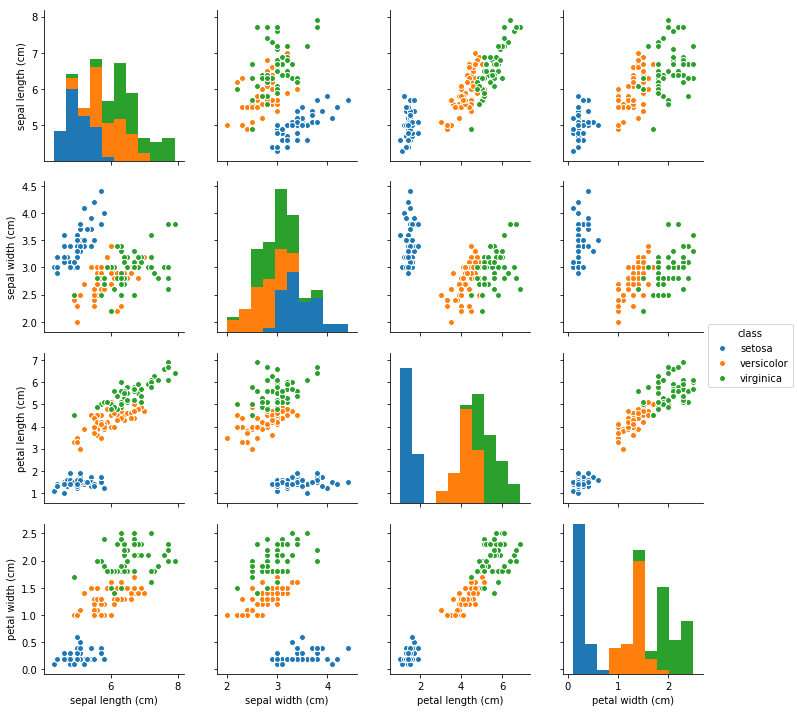

In [22]:
sns.pairplot(data, hue = 'class')

Sure enough, the strange distribution of the petal measurements exists because of the different species. This is actually great news for our classification task since it means that the petal measurements will make it easy to distinguish between Iris setosa and the Iris types.

Distinguishing Iris versicolor and virginica will prove much more difficult given how much their measurements overlap.

There are also correlations between petal length and petal width, as well as sepal length and sepal width. The field biologists assure us that this is expected: longer flower petals also tend to be wider, and the same applies for sepals.

We can also make violin plots of the data to compare the measurement distributions of the classes. Violin plots contain the same information as box plots, but also scale the box according to the density of the data.

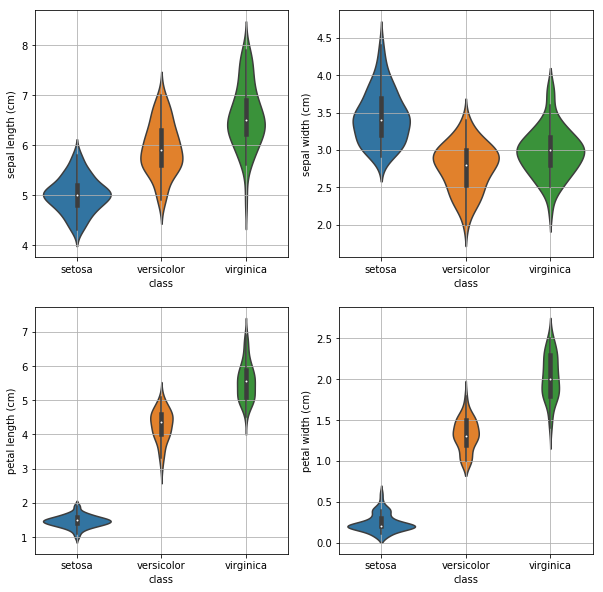

In [23]:
plt.figure(figsize = (10, 10))
for column_index, column in enumerate(data.columns):
    if column == 'class':
        continue
    plt.subplot(2, 2, column_index + 1)
    sns.violinplot(x = 'class', y = column, data = data)
    plt.grid()

### Step 5: Classification

Wow! All this work and we still haven't modelled the data.

As tiresome as it can be, tidying and exploring our data is a vital component to any data analysis. If we had jumped straight to the modelling step, we would have created a faulty classification model.

#### NB: Bad data leads to bad models. Always check the data first.

Assured that our data is now as clean as we can make it - and armed with some cursory knowledge of the distributions and relationships in our data set - it's time to make the next big step in our analysis: splitting the data into training and testing sets.

A **training set** is a random subset of the data that we can use to train the models. 

A **test set** is a random subset of the data (mutaully exclusive from the training set) that we use to validate our models on unforseen data.

In data sets like ours, it's easy for models to **overfit** the data: the model will learn the training set so well that it won't be able to handle most of the cases it's never seen before. This is why it's important for us to build the model with the training set, but score it with the test set.

Note that once we split the data into a training and testing set, we should treat the testing set like it no longer exists: we cannot use any information from the testing set to build our model or else we're cheating.

Let's set up our data first.

In [24]:
# we're using all four measurements as inputs 
# note that sci-kit learn expects each entry to be a list of values, e.g., 
# [[val1, val2, val3],
#  [val1, val2, val3].
#  ...]
# such that our input set is represented as a list of lists

# we can extract the data in this format from pandas like this:
all_inputs = data[['sepal length (cm)', 'sepal width (cm)', 
                   'petal length (cm)', 'petal width (cm)']].values

all_classes = data['class'].values

# make that you don't mix up the order of the entries
# all_inputs[5] inputs should correspond to the class in all_classes[5]

# here's what a subset of our inputs looks like:
all_inputs[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

Now our data is ready to be split.

In [25]:
from sklearn.model_selection import train_test_split

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_classes,random_state = 1)

With our data split, we can start fitting models to our data. We are all about decision tree classifiers, so let's start with one of those.

Decision tree classifiers are incredibly simple in theory. In their simplest form, decision tree classifiers ask a series of Yes/No questions about the data - each time getting closer to finding out the class of each entry - until they either classify the data set perfectly or simply can't differentiate a set of entries. This of it like a game of Twenty Questions, expect the computer is much, much better at it.

The nice part about decision tree classifiers is that they are **scale-invariant**, i.e., the scale of the features does not affect their performance, unlike machine learning models. In other words, it doesn't matter if our features range from 0 to 1 or 0 to 1000; decision tree classifiers will work with them just the same.

There are several parameters that we can tune to decision tree classifiers, but for now let's use a basic decision tree classifier.

In [26]:
from sklearn.tree import DecisionTreeClassifier

# create the classifier 
decision_tree_classifier = DecisionTreeClassifier()

# train the classifier on the training set 
decision_tree_classifier.fit(training_inputs, training_classes)

# validate the classifier on the testing set using classification accuracy 
decision_tree_classifier.score(testing_inputs, testing_classes)

0.9736842105263158

Heck yeah! Our model achieves ~97% classification accuracy without much effort.

However, theres a catch: depending on how our training and testing set was sampled, our model can achieve anywhere from 80% to 100% accuracy:

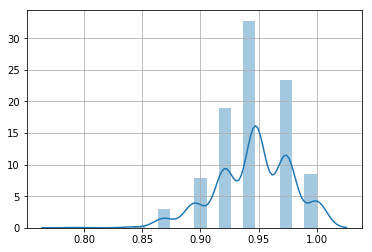

In [27]:
model_accuracies = []

for repetition in range(1000):
    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(all_inputs, all_classes)
    
    decision_tree_classifier = DecisionTreeClassifier()
    decision_tree_classifier.fit(training_inputs, training_classes)
    classifier_accuracy = decision_tree_classifier.score(testing_inputs, testing_classes)
    model_accuracies.append(classifier_accuracy)
    
sns.distplot(model_accuracies)
plt.grid()

It's obviously a problem that our model performs quite differently depending on the subset of the data it's trained on. This phenomenon is known as **overfitting**: the model is learning to classify the training set so well that it doesn't generalize and perform well on data it hasn't seen before.


#### Cross-validation

This problem is the main reason that most data scientists perform **k-fold cross-validation** on their models: spliting the original data set into k subsets, use one of the subsets as the testing set, and the rest of the subsets as the training set. This process is then repeated k times such that each subset is used as the testing set exactly once.

10-fold cross-validation is the most common choice, so let's use that here. Performing 10-fold cross-validation on our data set looks something like this (each sqaure is an entry in our data set):

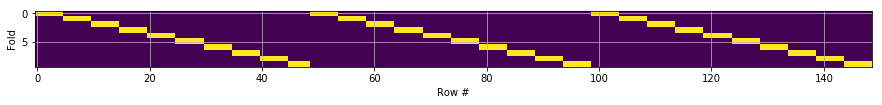

In [28]:
filterwarnings('ignore')
import numpy as np 
from sklearn.cross_validation import StratifiedKFold

def plot_cv(cv, n_samples):
    masks = []
    for train, test in cv:
        mask = np.zeros(n_samples, dtype = bool)
        mask[test] = 1
        masks.append(mask)
        
    plt.figure(figsize = (15, 15))
    plt.imshow(masks, interpolation = 'none')
    plt.ylabel('Fold')
    plt.xlabel('Row #')
    plt.grid()

plot_cv(StratifiedKFold(all_classes, n_folds = 10), len(all_classes))

We used **Stratified k-fold cross-validation** in the code above. Stratified k-fold keeps the class proportions the same across all of the folds, which is vital for maintaining a representative subset of our data set. (e.g., so we don't have 100% Iris setosa entries in one of the folds.)

We can perform 10-fold cross-validation on our model with the following code:

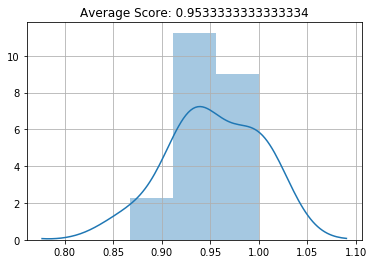

In [29]:
from sklearn.cross_validation import cross_val_score

decision_tree_classifier = DecisionTreeClassifier()

# cross_val_score returns a list of the scores, which we can visualize
# to get a reasonable estimate of our classifier's performance
cv_scores = cross_val_score(decision_tree_classifier, all_inputs, all_classes, cv = 10)
sns.distplot(cv_scores)
plt.title('Average Score: {}'.format(np.mean(cv_scores)))
plt.grid()

### Parameter tuning

Every machine learning model comes with a variety of parameters to tune, and these parameters can be vitally important to the performance of our classifier. For example, if we severely limit the depth of our decision tree classifier:

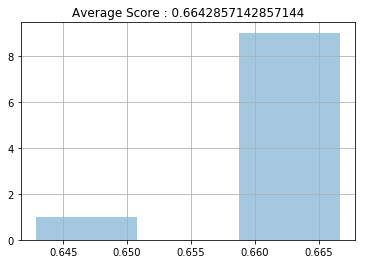

In [30]:
decision_tree_classifier = DecisionTreeClassifier(max_depth=1)

cv_scores = cross_val_score(decision_tree_classifier, all_inputs, all_classes, cv = 10)
sns.distplot(cv_scores, kde = False)
plt.title('Average Score : {}'.format(np.mean(cv_scores)))
plt.grid()

The classification accuracy falls tremendously. 

Therefore, we need to find a systematic method to discover the best parameters for our model and data set.

The most common method for model parameter tuning is **Grid Search**. The idea behind Grid Search is simple: explore a range of parameters and find the best-performing parameter combination. Focus your search on the best parameters, then repeat this process several times until the best parameters are discovered.

Let's tune our decision tree classifier. We'll stick to only two parameters for now, but it's possible to simultaneously explore dozens of parameters if we want:

In [31]:
from sklearn.model_selection import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'max_depth' : [1, 2, 3, 4, 5],
                  'max_features' : [1, 2, 3, 4]}

cross_validation = StratifiedKFold(all_classes, n_folds=10)

grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid = parameter_grid,
                           cv = cross_validation)

grid_search.fit(all_inputs, all_classes)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameter: {}'.format(grid_search.best_params_))

Best score: 0.9664429530201343
Best parameter: {'max_depth': 2, 'max_features': 3}


Now let's visualize the grid search to see how the parameters interact.

Text(33,0.5,'max_depth')

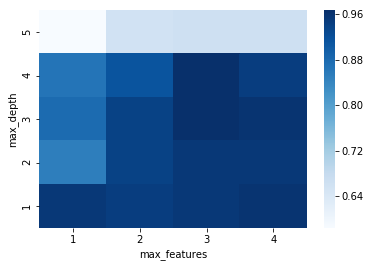

In [32]:
filterwarnings('ignore')
grid_visualization = []

for grid_pair in grid_search.grid_scores_:
    grid_visualization.append(grid_pair.mean_validation_score)
    
grid_visualization = np.array(grid_visualization)
grid_visualization.shape = (5, 4)
sns.heatmap(grid_visualization, cmap = 'Blues')
plt.xticks(np.arange(4) + 0.5, grid_search.param_grid['max_features'])
plt.yticks(np.arange(5) + 0.5, grid_search.param_grid['max_depth'][::-1])
plt.xlabel('max_features')
plt.ylabel('max_depth')

Now we have a better sense of the parameter space: we know that we need a max_depth of at least 2 to allow the decision tree to make more than a one-off decision.

max_features doesn't really seem to make a big difference here as long as we have 2 of them, which makes sense since our data set has only 4 features and is relatively easy to classify. (Remember that one of the classes was easily seperable from the rest based on a single feature.)

Let's go ahead a broad grid search to find the best settings for a handful of parameters.

In [33]:
decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'criterion'    : ['gini', 'entropy'],
                  'splitter'     : ['best', 'random'],
                  'max_depth'    : [1, 2, 3, 4, 5],
                  'max_features' : [1, 2, 3, 4]}

cross_validation = StratifiedKFold(all_classes, n_folds=10)

grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid = parameter_grid,
                           cv = cross_validation)

grid_search.fit(all_inputs, all_classes)
print('Best scores: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best scores: 0.959731543624161
Best parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 2, 'splitter': 'best'}


Now we can take the best classifier from the Grid Search and use that:

In [34]:
decision_tree_classifier = grid_search.best_estimator_
decision_tree_classifier

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

We can visualize the decision tree with GraphViz to see how it's making the classifications:

In [35]:
import sklearn.tree as tree
from sklearn.externals.six import StringIO

with open('iris_dtc.dot', 'w') as out_file:
    out_file = tree.export_graphviz(decision_tree_classifier, out_file = out_file)

Alright! We finally have our demo classifier. Let's create soeme visuals of its performance so we have something to show.

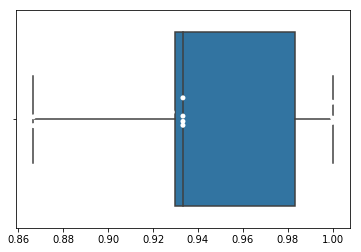

In [36]:
dt_scores = cross_val_score(decision_tree_classifier, all_inputs, all_classes, cv = 10)

sns.boxplot(dt_scores)
sns.stripplot(dt_scores, jitter = True, color = 'white')

That's a little boring. What is we compare another classifier to see how they perform?

We already know from previous projects that Random Forest classifiers usually work better than individual decision trees. A common problem that decision trees face is that they're prone to overfitting: they complexify to the point that they classify the training set near-perfectly, but fail to generalize the data they have not seen before.

**Random Forest Classifiers** work around that limitation by creating a whole bunch of decision trees (hence "forest") - each trained on random subsets of training samples (drawn with replacement) - and have the decision trees work together to make a more accurate classification.

Let that be a lesson for us: **Even in Machine Learning, we get better results when we work together!**

Let's see if a Random Forest classifier works better here.

The great part about scikit-learn is that the training, testing, parameter tuning, etc. process is athe same for all models, so we only need to plug in the new classifier.

In [37]:
from sklearn.ensemble import RandomForestClassifier

random_forest_classifier = RandomForestClassifier()

parameter_grid = {'n_estimators'  : [5, 10, 25, 50],
                  'criterion'     : ['gini', 'entropy'],
                  'max_features'  : [1, 2, 3, 4], 
                  'warm_start'    : [True, False]}

cross_validation = StratifiedKFold(all_classes, n_folds=10)

grid_search = GridSearchCV(random_forest_classifier,
                           param_grid = parameter_grid,
                           cv = cross_validation)

grid_search.fit(all_inputs, all_classes)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameter: {}'.format(grid_search.best_params_))

grid_search.best_estimator_

Best score: 0.9664429530201343
Best parameter: {'criterion': 'gini', 'max_features': 1, 'n_estimators': 5, 'warm_start': True}


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=1, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=None, verbose=0, warm_start=True)

Now we can compare their performance.

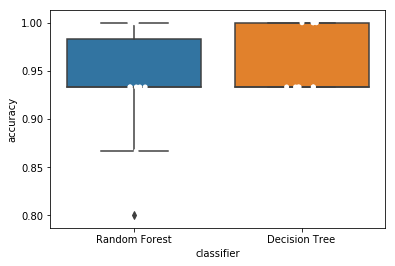

In [38]:
random_forest_classifier = grid_search.best_estimator_

rf_df = pd.DataFrame({'accuracy'   : cross_val_score(random_forest_classifier, all_inputs, all_classes, cv = 10),
                      'classifier' : ['Random Forest'] * 10})
dt_df = pd.DataFrame({'accuracy'   : cross_val_score(decision_tree_classifier, all_inputs, all_classes, cv = 10),
                      'classifier' : ['Decision Tree'] * 10})
both_df = rf_df.append(dt_df)

sns.boxplot(x = 'classifier', y = 'accuracy', data = both_df)
sns.stripplot(x = 'classifier', y = 'accuracy', data = both_df, jitter = True, color = 'white')

They both seem to perform about the same on this data set. This is probably becasue of the limitations of our data set: we have only 4 features to make the classification, and Random Forest classifiers excel when there's hundreds of possible features to look at. In other words, there wasn't much room for improvement with this data set.


### Step 6: Reproducibility

Ensuring that our work is reproducible is the last and - arguably - the most important step in any analysis. **As a rule, we shouldn't place much weight on a discovery that can't be reproducible.** As such, if our analysis isn't reproducible, we might as well not have done it.

Notebooks like this one go a long way toward making our work reproducible. Since we documented every step as we moved along, we have a written record of what we did and why we did it - both in text and code.

Beyond recording what we did, we should also document what software and hardware we used to perform our analysis. This typically goes at the top of our notebooks so our readers know what tools to use.

`%install_ext https://raw.githubusercontent.com/rasbt/watermark/master/watermark.py`

`%load_ext watermark`

`%watermark -a 'wildlyclassyprince' -nmv --packages numpy,pandas,scikit-learn,matplotlib,Seabornss`

Finally, let's extract the core of our work from steps 1-5 and turn it into a single pipeline.

In [ ]:
%matplotlib inline
import pandas as pd 
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split, cross_val_score

# we can jump to working with the cleaned data set
#data = pd.read('filename')

# testing our data: our analysis will stop here if any of our assertions are wrong

# we know that we should only have 3 classes
assert len(data['class'].unique()) == 3

# we know that sepal length for Iris versicolor should never be less than 2.5 cm
assert data.loc[data['class'] == 'versicolor', 'sepal length (cm)'].min() >= 2.5

# we know that our data should have no missing values 
assert len(data.loc[(data['sepal length (cm)'].isnull())  |
                    (data['sepal width (cm)'].isnull())   |
                    (data['petal length (cm)'].isnull())  |
                    (data['petal width (cm)'].isnull())]) == 0

all_inputs = data[['sepal length (cm)', 'sepal width (cm)',
                   'petal length (cm)', 'petal width (cm)']].values

all_classes = data['class'].values

# this is the classifier that came out of GridSearch
random_forest_classifier = RandomForestClassifier(bootstrap = True, class_weight = None, criterion = 'gini', 
                                                  max_depth = None, max_features = 3, max_leaf_nodes = None, 
                                                  min_samples_leaf = 1, min_samples_split = 2, 
                                                  min_weight_fraction_leaf = 0.0, n_estimators = 5, n_jobs = 1,
                                                  oob_score = False, random_state = None, verbose = 0, warm_start = True) 

# all that's left to do now is plot the cross validation scores 
rf_classifier_scores = cross_val_score(random_forest_classifier, all_inputs, all_classes, cv = 10)
sns.boxplot(rf_classifier_scores)
sns.stripplot(rf_classifier_scores, jitter = True, color = 'white')

# ... and show some of the predictions from the classifier 
(training_inputs,
 testing_inputs,
 training_classes, 
 testing_classes) = train_test_split(all_inputs, all_classes, train_size = 0.75)

random_forest_classifier.fit(training_inputs, training_classes)

for input_features, prediction, actual in zip(testing_inputs[:10], 
                                              random_forest_classifier.predict(testing_inputs[:10]),
                                              testing_classes[:10]):
    print('{}\t-->\t{}\t\t(Actual: {})'.format(input_features, prediction, actual))

There we have it: we have completed a reproducible Machine Learning pipeline to demo. We've met the success criteria that we set from the beginning (>90% accuracy), and our pipeline is flexible enough to handle new inputs or flowers when that data set is ready. Not bad for our first week on the job!